<a href="https://colab.research.google.com/github/Tomantons/Basic-JS/blob/main/14382143_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###The dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


About Dataset
Context

http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5


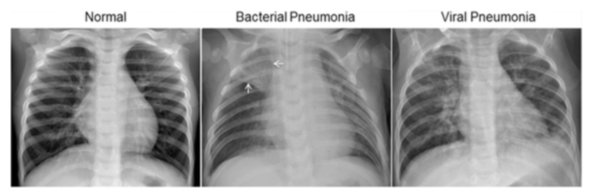

Figure S6. Illustrative Examples of Chest X-Rays in Patients with Pneumonia, Related to Figure 6
The normal chest X-ray (left panel) depicts clear lungs without any areas of abnormal opacification in the image. Bacterial pneumonia (middle) typically exhibits a focal lobar consolidation, in this case in the right upper lobe (white arrows), whereas viral pneumonia (right) manifests with a more diffuse ‘‘interstitial’’ pattern in both lungs.
http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5
Content

The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

###Importing required libraries

<p style="text-align: justify">Along with traditional libraries imported for tensor manipulation, mathematical operations and graphics, one scikit-learn module (confusion_matrix for performance metric assessment) and specific <b>Keras image preprocessing</b> (<a href="https://keras.io/api/preprocessing/image/#imagedatagenerator-class">ImageDataGenerator</a>) and <b>deep learning</b> objects (<a href="https://keras.io/api/models/sequential/">Sequential</a>, <a href="https://keras.io/api/layers/convolution_layers/convolution2d/">Conv2D</a>, <a href="https://keras.io/api/layers/pooling_layers/max_pooling2d/">MaxPooling2D</a>, <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten">Flatten</a>, <a href="https://keras.io/api/layers/core_layers/dense/">Dense</a>) are used in this exercise.</p>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.metrics import confusion_matrix

from keras.preprocessing.image import ImageDataGenerator, array_to_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')
start_time = datetime.now()

###Critical hyperparameters

<p style="text-align: justify">Machine learning hyperparameters are parameters whose value is set before the learning process starts. Several rounds of this exercise showed that specific hyperparameters play an important role when it comes to final prediction accuracy and execution runtime, reason why they have been segregated in the code session below:</p>
<ul>
    <li style="text-align: justify">'<b>hyper_dimension</b>': target image width and length in pixels considered when original images need to be rescaled for processing;</li>
    <li style="text-align: justify">'<b>hyper_epochs</b>': number of epochs (leaning iterations through which the whole dataset is exposed to the machine for weight updates);</li>
    <li style="text-align: justify">'<b>hyper_batch_size</b>': size of image batches;</li>
    <li style="text-align: justify">'<b>hyper_feature_maps</b>': reference number of feature maps generated by convolutional layers;</li>
    <li style="text-align: justify">'<b>hyper_channels</b>' and 'hyper_mode': number of channels utilized in the learning process. For colored RGB images, hyper_channels = 3 and hyper_mode = 'rgb', yet for grayscale images hyper_channels = 1 and hyper_mode = 'grayscale'.</li>
</ul>
<p style="text-align: justify">Specific considerations on hyperparameters are provided through the exercise.</p>   

In [ ]:
hyper_dimension = 500
hyper_epochs = 100
hyper_batch_size = 16
hyper_feature_maps = 32
hyper_channels = 1
hyper_mode = 'grayscale'

###Deep Learning - Convolutional Neural Network

### Creating and compiling the deep learning model

A Convolutional Neural Network is a special type of an Artificial Intelligence implementation which uses a  special mathematical matrix manipulation called the convolution operation to process data from the images.

* A **convolution** does this by multiplying two matrices and yielding a third, smaller matrix.
* The Network takes an input image, and uses a filter **(or kernel)**  to create a **feature map** describing the image.
* In the convolution operation, we take a filter (usually 2x2 or 3x3 matrix ) and **slide** it over the image matrix. The coresponding numbers in both matrices are multiplied and and added to yield a single number describing that input space. This process is repeated all over the image.This can be seen in the following animation
![https://cdn-images-1.medium.com/max/800/1*VVvdh-BUKFh2pwDD0kPeRA@2x.gif](https://cdn-images-1.medium.com/max/800/1*VVvdh-BUKFh2pwDD0kPeRA@2x.gif)                                     

-------> This is a 2-D representation of calculations happening in 3 dimensions. This is what is actually happening
![Source: https://cdn-images-1.medium.com/max/800/1*EuSjHyyDRPAQUdKCKLTgIQ.png](https://cdn-images-1.medium.com/max/800/1*EuSjHyyDRPAQUdKCKLTgIQ.png)      

* We use different filters to pass over our inputs, and take all the feature maps, put them together as the final output of the convolutional layer.
* We then pass the output of this layer through a non-linear activation function. The most commonly used one is ReLU.
* The next step of our process involves further reducing the dimensionality of the data which will lower the computation power required for training this model. This is      achieved by using a **Pooling Layer.** The most commonly used one is **max pooling** which takes the maximum value in the window created by a filter. This              significantly reduces the training time and preserves significant information.
![https://cdn-images-1.medium.com/max/800/1*vbfPq-HvBCkAcZhiSTZybg.png](https://cdn-images-1.medium.com/max/800/1*vbfPq-HvBCkAcZhiSTZybg.png)

Two of the most commonly associated words with CNN are **stride** and **padding **

**STRIDE:** Stride just means the amount a filter moves during a covolution operation. So, a stride of 1 means that the filter will slide 1 pixel after each covolution operation as shown in this animation.
![https://cdn-images-1.medium.com/max/800/0*iqNdZWyNeCr5tCkc.](https://cdn-images-1.medium.com/max/800/0*iqNdZWyNeCr5tCkc.)

**PADDING:** Padding is just zero value pixels that surround the input image. This protects the loss of any valuable information since the feature map is ever shrinking.

*This section was inspired by this post: https://medium.freecodecamp.org/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050*

*The gifs/animations are from this post: https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2*


<p style="text-align: justify">A traditional convolutional neural network aimed at image processing and interpretation is adopted:</p>
<ol>
    <li style="text-align: justify"><b>Three pairs of convolution / pooling layers</b>: first and second produce 32 feature maps processed by subsequent 2x2 pooling engines generating 32 pooled maps, while the third produces 64 feature maps also processed by a subsequent 2x2 pooling engine generating a 64 pooled map. Convolution is performed with 3x3xk kernels, where k = 1 for grayscale images and k = 3 for RGB images. The input shape is a 500x500 pixels image (1 or 3 channels, as described above). 'ReLU' (Rectifier Linear Unit) is the activation function of choice;</li>
    <li style="text-align: justify">A <b>flattening layer</b>, responsible to provide the subsequent artificial neural network (ANN) with an flattened, unidimensional tensor with the output of the last pooling layer;</li>
    <li style="text-align: justify">A <b>full connection pair of layers</b> with 64 and 1 neuron, respectively, responsible to perform binary classification ('normal' or 'pneumonia').</li>
</ol>

<p style="text-align: justify">The model is compiled using '<a href="https://keras.io/api/optimizers/adam/"><b>adam</b></a>' (stochastic gradient descent method based on adaptive estimation of first-order and second-order moments) as the <b>optimization function</b>. Since this is a classification problem ('normal' versus 'pneumonia' cases), '<a href="https://keras.io/api/losses/probabilistic_losses/#binary_crossentropy-function"><b>binary_crossentropy</b></a>' is elected as the loss function. Performance will be assessed via the '<b>accuracy</b>' metric.</p>   

In [ ]:
# Initializing the CNN
classifier = Sequential()

# Convolution & pooling - First convolution layer
classifier.add(Conv2D(hyper_feature_maps, (3, 3),
                      input_shape = (hyper_dimension,
                                     hyper_dimension,
                                     hyper_channels),
                      activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution & pooling - Second convolution layer (same as first layer)
classifier.add(Conv2D(hyper_feature_maps, (3, 3),
                      input_shape = (hyper_dimension,
                                     hyper_dimension,
                                     hyper_channels),
                      activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution & pooling - Third convolution layer
classifier.add(Conv2D(hyper_feature_maps * 2, (3, 3),
                      input_shape = (hyper_dimension,
                                     hyper_dimension,
                                     hyper_channels),
                      activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = hyper_feature_maps * 2, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam',
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])


###Creating training and validation sets through image flowing with augmentation

<p style="text-align: justify"><b>Augmentation</b> is an important tool to mitigate the risk of <b>overfitting</b> in machine learning exercises. When it comes to images, augmentation techniques provide modified versions of the original images through a series of specific procedures. As the chosen dataset is not as large as desired for an image processing experience, augmentation can fill this blank and help address the risk of overfitting.</p>
<p style="text-align: justify">Keras '<b>ImageDataGenerator</b>' object (class) is used in this exercise as the primary tool to generate augmented training and validation image sets. Two instances of this object are created:</p>
<ul>
    <li style="text-align: justify">'<b>train_gen</b>' will be utilized to generate the training set. As the original images stored in folders (more ahead) correspond to 500x500 pixel matrices of real values ranging from 0 to 255, rescaling is performed through the 'rescale' parameter. Also, augmentation is achieved with some image shearing, zooming and vertical flips.</li>
    <li style="text-align: justify">'<b>val_gen</b>' will be utilized to generate the validation set. Only rescaling is performed in this case, as we intend to validate the learning process making use of pure images with no manipulation.</li>
</ul>
<p style="text-align: justify">The '<a href="https://keras.io/api/preprocessing/image/#flowfromdirectory-method"><b>flow_from_directory</b></a>' method allows for pulling from specific folders images for training and validation, resizing them, grouping them in batches and specifying the machine objective (a binary classification, in this case) and the color mode of choice. The use of 'flow_from_directory' assumes that the data is properly stored in appropriate folders with a predetermined structure:</p>
<ul>
    <li style="text-align: justify">train</li>
    <ul>
        <li style="text-align: justify">normal</li>
        <li style="text-align: justify">pneumonia</li>
    </ul>
    <li style="text-align: justify">val</li>
    <ul>
        <li style="text-align: justify">normal</li>
        <li style="text-align: justify">pneumonia</li>
    </ul>
</ul>

In [ ]:
# Creating training and validation image flows

train_gen = ImageDataGenerator(rescale = 1./255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               vertical_flip = True)

val_gen = ImageDataGenerator(rescale = 1./255)

train_set = train_gen.flow_from_directory('/content/drive/MyDrive/Dataset/chest_xray/train',
                                          target_size = (hyper_dimension,
                                                         hyper_dimension),
                                          batch_size = hyper_batch_size,
                                          class_mode = 'binary',
                                          color_mode = hyper_mode)

val_set = val_gen.flow_from_directory('/content/drive/MyDrive/Dataset/chest_xray/val',
                                      target_size = (hyper_dimension,
                                                     hyper_dimension),
                                      batch_size = hyper_batch_size,
                                      class_mode = 'binary',
                                      color_mode = hyper_mode)

Found 4192 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.


###Image visualization prior to fitting

<p style="text-align: justify">Once training and testing sets are generated, it is important to <b>investigate how images look like</b>.</p>
<p style="text-align: justify">Understanding the structure of the training and validation sets is important to manipulate them. Let's take the training set as an example.</p>
<ul>
    <li style="text-align: justify">'<b>train_set[0]</b>' corresponds to the first set of image batches flowed from the source folder;</li>
    <li style="text-align: justify">'<b>train_set[0][0]</b>' corresponds to the first batch of 16 images included in the first set of batches;</li>
    <li style="text-align: justify">Each of the 16 images in this first batch can be accessed via the 'array_to_img' method and properly plotted.</li>
</ul>
<p style="text-align: justify">The analysis of the first batch in the training set shows that augmentation has been successfully performed. Some images have been slightly shared, zoomed in and/or flipped vertically. Also, it is evident that we are now dealing with grayscale images, as expected.</p>

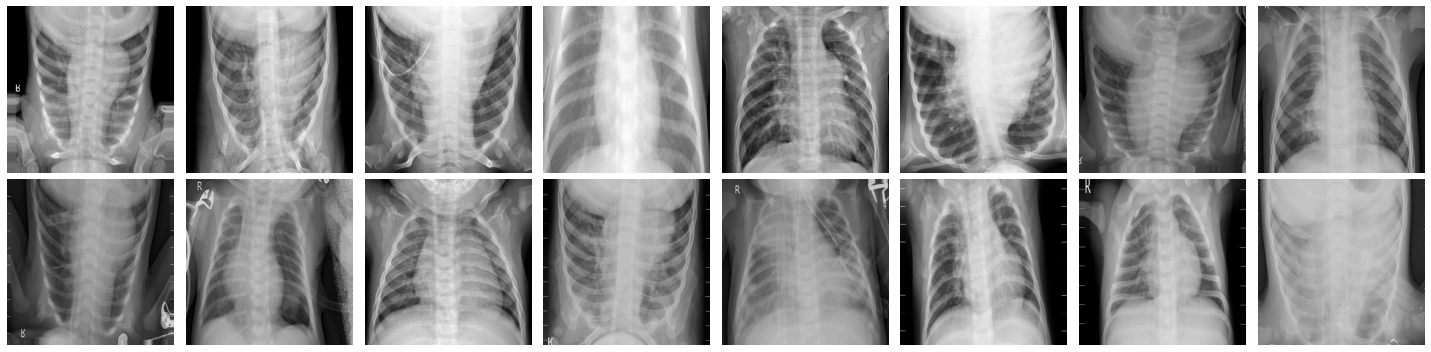

In [ ]:
# Visualizing images in the first training set batch

image_batch = train_set[0][0]

plt.figure(figsize=(20,5))
for i in range(len(image_batch)):
    plt.subplot(2,8,i+1)
    pil_img = array_to_img(image_batch[i])
    plt.imshow(pil_img,cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

**bold text**### Fitting the model

<p style="text-align: justify">As we are dealing with a relatively large dataset and augmentation has been implemented, '<b>fit_generator</b>' is our method of choice for fitting purposes. (<b>Note</b>: 'fit' also supports data augmentation from TensorFlow 2.2.0, so it could also be used in this exercise. As the code may be forked by coders not equipped with TF 2.2.0, the original method, 'fit_generator', has been maintained herein.)</p>
<p style="text-align: justify">The model will be trained in <b>100 epochs</b>. Comments on this choice will be provided ahead.</p>

In [ ]:
# Fitting the model

results = classifier.fit_generator(train_set,
                                   steps_per_epoch = len(train_set),
                                   epochs = hyper_epochs,
                                   validation_data = val_set,
                                   validation_steps = len(val_set))

Epoch 1/1
262/262 [==============================] - 169s 645ms/step - loss: 0.3319 - accuracy: 0.8624 - val_loss: 0.0939 - val_accuracy: 0.9365


###Predicting pneumonia

<p style="text-align: justify">The <b>test set</b> must be generated so that predictions on it can be made. The same 'flow_from_directory' method is applied, as images are segregated in different folders for different diagnosis ('normal' and 'pneumonia').</p>
<p style="text-align: justify">As predictions will be confronted with the actual test image labels for performance assessment, it is assured that <b>no shuffling</b> will be executed. Also, test images will be flown from the corresponding folders individually (batches of <b>1 image each</b>).</p>
<p style="text-align: justify">The model will provide for each image a scalar output within the range [0,1] corresponding to the probability a given image represents a pneumonia case. In other words, the higher the output, the higher the probability of a pneumonia occurrence.</p>
<p style="text-align: justify">As we intend to quantify true positive, true negative, false positive and false negative cases and visualize them in a confusion matrix, scalar results will be segregated in two subsets (<b>below and above the 0.5 threshold</b>), corresponding to 'normal' and 'pneumonia' diagnosis, respectively.</p>

In [ ]:
# Creating test image flow

test_gen = ImageDataGenerator(rescale = 1./255)

test_set = test_gen.flow_from_directory('/content/drive/MyDrive/Dataset/chest_xray/test',
                                        target_size = (hyper_dimension,
                                                       hyper_dimension),
                                        batch_size = 1,
                                        class_mode = None,
                                        color_mode = hyper_mode,
                                        shuffle=False)

# Making predictions

predictions = classifier.predict_generator(test_set)
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

Found 624 images belonging to 2 classes.


## Results

<p style="text-align: justify">The segregation described in Section 5.5 allows for constructing a confusion matrix and calculating the overall prediction accuracy from it.</p>

In [ ]:
# Confusion matrix

cm = pd.DataFrame(data=confusion_matrix(test_set.classes, predictions, labels=[0, 1]),
                  index=["Actual Normal", "Actual Pneumonia"],
                  columns=["Predicted Normal", "Predicted Pneumonia"])
cm

,Predicted Normal,Predicted Pneumonia
Actual Normal,126,108
Actual Pneumonia,6,384


## Discussion and Final Remarks

<p style="text-align: justify">Results show that very <b>low losses</b> and <b>high accuracies</b> (exceeding 96% in validation) are obtained with a traditional CNN approach, without any refinement based, for example, on the use of pretrained image classification models.</p>
<p style="text-align: justify">In addition, when we deal with medical diagnosis, a false positive (i.e. predicting illness when the patient is healthy) is <b>less critical</b> than a false negative (predicting healthiness when the patient is sick). The number of false negatives obtained with the CNN presented here is extremely low, which positions the machine developed here as a reliable ancillary tool for pneumonia detection.</p>
<p style="text-align: justify">Specific considerations on the model and the hyperparameters must be made:</p>
<ol>
    <li style="text-align: justify">As mentioned above, the approach presented here is very traditional. The CNN architecture adopted here follows those Yann LeCun (recognized as founding father of convolutional networks and their use in computer vision) promoted in the 1990s for image classification. <b>No pretrained model</b> was used here, and their employment could be taken as a suggestion for further improvements;</li>
    <li style="text-align: justify">The model was trained several times with a <b>variety of hyperparameter combinations</b>. The final version depicted here was the one through which the best results were obtained. On hyperparameters:</li>
    <ul>
        <li style="text-align: justify">Tested numbers of epochs were 10, 25, 50 and 100. Reasonable results (low losses and high accuracy on both validation AND testing) were achieved only with <b>50 or 100 epochs</b>. The final training was performed over 100 epochs;</li>
        <li style="text-align: justify">The model was fed with 400x400, 500x500 and 600x600 pixels images. Best performance was achieved with <b>500x500</b> resized input images;</li>
        <li style="text-align: justify">Batches of <b>16 images</b> proved to be the best choice over 8, 32 and 64 image alternatives. It must be emphasized though that much faster runtime could be achieved with the use of TPUs, case in which larger batches would be more appropriate. There is an ongoing discussion on how TPUs handle floating scalars and how large batches should be to extract from TPUs their maximum performance. As this exercise made use of GPUs only, this topic was not explored.</li>
        <li style="text-align: justify">Finally, the model was trained with both 3-channel (RBG) and 1-channel (grayscale) versions of input images (which are originally 3-channel samples). As a higher number of channels carries in theory a larger amount of information, it was initially expected that 3-channel image trainings would lead to better machines. However, this was not observed - <b>grayscale</b>-based exercises led to higher accuracies and lower losses. Further investigation could be made, but in a first assessment of such results, considering that in pneumonia detection cases we look for <b>opacities</b> in the lungs, those might be more evidenced in grayscale samples than in colored ones. For now this is just an assumption demanding further analysis.</li>
    </ul>
</ol>

In [ ]:
end_time = datetime.now()

print('\nStart time', start_time)
print('End time', end_time)
print('Time elapsed', end_time - start_time)


Start time 2023-10-15 11:09:32.616341
End time 2023-10-15 11:12:37.506710
Time elapsed 0:03:04.890369
